# Customer Churn Analysis
### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing Libraries

In [1]:
# To Read and Process Data
import pandas as pd
import numpy as np


# For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Getting over warning messages
import warnings
warnings.filterwarnings('ignore')

# For Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# for scaling
from sklearn.preprocessing import StandardScaler

# To display all columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Reading File

In [4]:
df = pd.read_csv('Telecom_customer_churn.csv')

## Overall Data Analysis

In [5]:
# getting to know size of data set, to know overall records, and columns
print(f'Number of rows and columns in given Data Frame is {df.shape}')

Number of rows and columns in given Data Frame is (7043, 21)


In [6]:
df.shape

(7043, 21)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
890,5898-IGSLP,Male,0,Yes,Yes,31,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,89.30,2823,No
5447,8660-BUETV,Female,0,No,No,3,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.75,148.05,No
3436,0428-AXXLJ,Male,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.50,516.3,No
6849,5060-TQUQN,Male,0,Yes,Yes,30,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),83.55,2570.2,No
4680,1986-PHGZF,Male,1,No,No,18,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),58.40,964.9,No
2604,6481-ESCNL,Female,0,No,No,29,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),100.55,2878.75,No
154,3077-RSNTJ,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.5,No
6406,4450-YOOHP,Female,0,No,No,39,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),50.65,1905.4,No
2417,4307-KWMXE,Male,0,No,No,10,No,No phone service,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,35.75,389.8,No
4335,9208-OLGAQ,Female,1,No,No,18,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,84.95,1443.65,No


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Removing duplicate values
df.duplicated().sum()

0

In [12]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

### Observations - 
- There are no duplicate value
- There is presence of ' ' in data set. reading again by replacing these values.

In [13]:
df = pd.read_csv('Telecom_customer_churn.csv', na_values=[' '])

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.TotalCharges.isnull().sum()

11

In [17]:
df.TotalCharges.dropna(inplace=True)

## Gettting to Know Five Number Summery for Continuous variable

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Observation - 

In [19]:
df.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Observation - 

In [20]:
# Feature Wise missing Values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
# Seperating Data as categorical and Numerical Data
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [22]:
categorical_features

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [23]:
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [24]:
print(f'Total Categorical Features are {len(categorical_features)}')
print(f'Total Numerical Features are {len(numerical_features)}')

Total Categorical Features are 17
Total Numerical Features are 4


### Observation -
- Total Categorical features are 18
- Total Numerical Features are 3

In [25]:
df.isnull().sum().sum()

11

In [26]:
# All missing Values
print("There are total", df.isnull().sum().sum(), "missing values in dataset")

There are total 11 missing values in dataset


## Plotting to understand Data Distribution

No     5174
Yes    1869
Name: Churn, dtype: int64


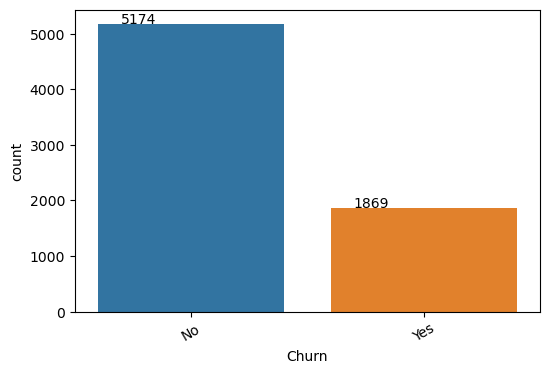

In [27]:
plt.figure(dpi=100)
plot = sns.countplot('Churn',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Churn.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

Male      3555
Female    3488
Name: gender, dtype: int64


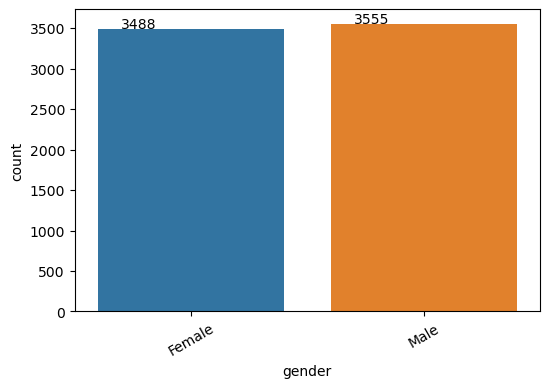

In [28]:
plt.figure(dpi=100)
plot = sns.countplot('gender',data=df)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.gender.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observation - 
- Total 1869 employess left out of 7043
- Data is almost balanced

No     5174
Yes    1869
Name: Churn, dtype: int64


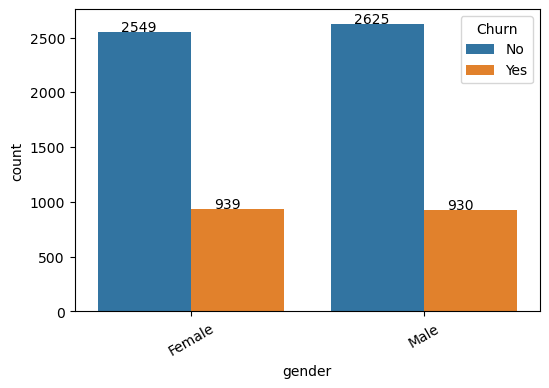

In [29]:
plt.figure(dpi=100)
plot = sns.countplot('gender',data=df, hue='Churn')# Plot the decision boundary. For that, we will assign a color to each
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Churn.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No     3641
Yes    3402
Name: Partner, dtype: int64


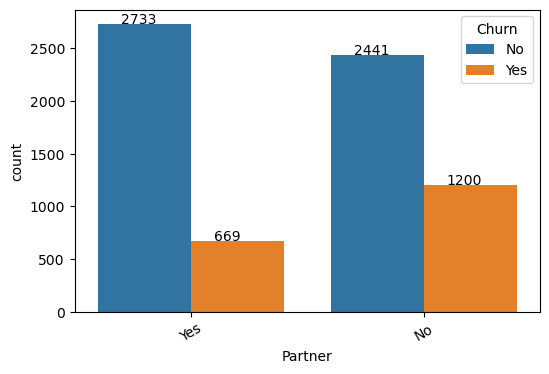

In [30]:
plt.figure(dpi=100)
plot = sns.countplot('Partner',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Partner.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No     4933
Yes    2110
Name: Dependents, dtype: int64


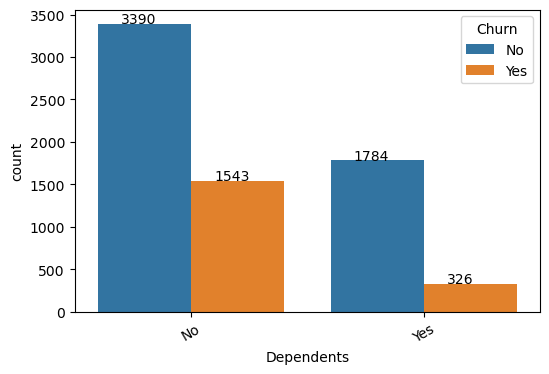

In [31]:
plt.figure(dpi=100)
plot = sns.countplot('Dependents',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Dependents.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

Yes    6361
No      682
Name: PhoneService, dtype: int64


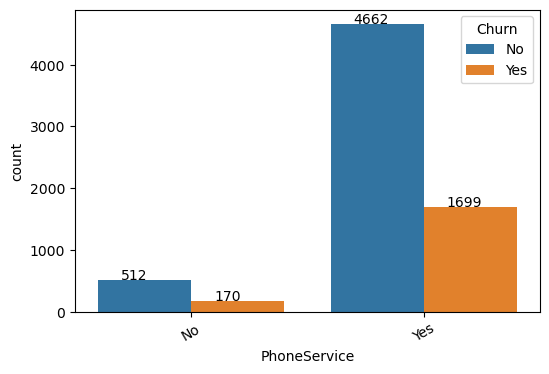

In [32]:
plt.figure(dpi=100)
plot = sns.countplot('PhoneService',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PhoneService.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


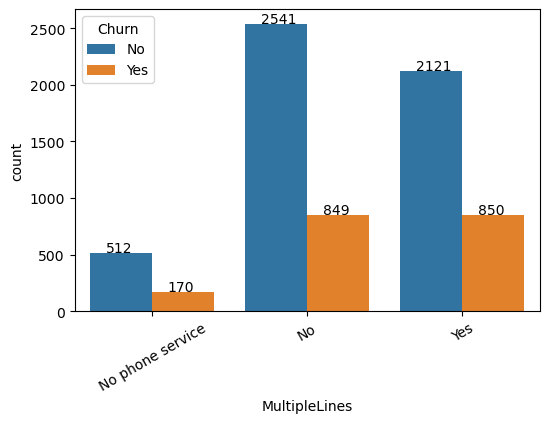

In [33]:
plt.figure(dpi=100)
plot = sns.countplot('MultipleLines',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.MultipleLines.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


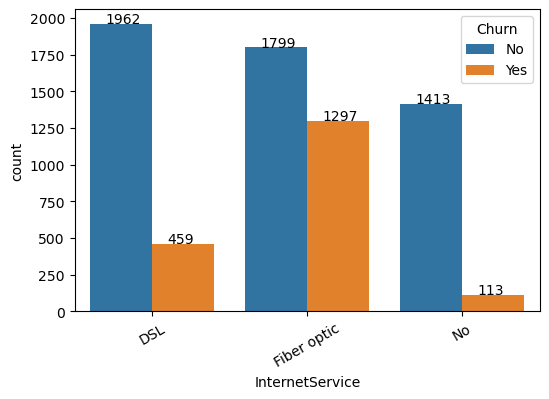

In [34]:
plt.figure(dpi=100)
plot = sns.countplot('InternetService',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.InternetService.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


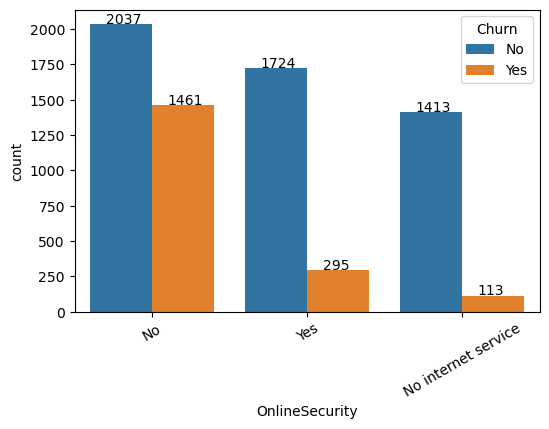

In [35]:
plt.figure(dpi=100)
plot = sns.countplot('OnlineSecurity',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.OnlineSecurity.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


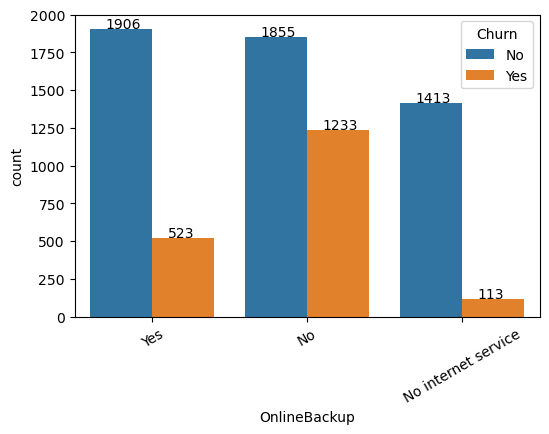

In [36]:
plt.figure(dpi=100)
plot = sns.countplot('OnlineBackup',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.OnlineBackup.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


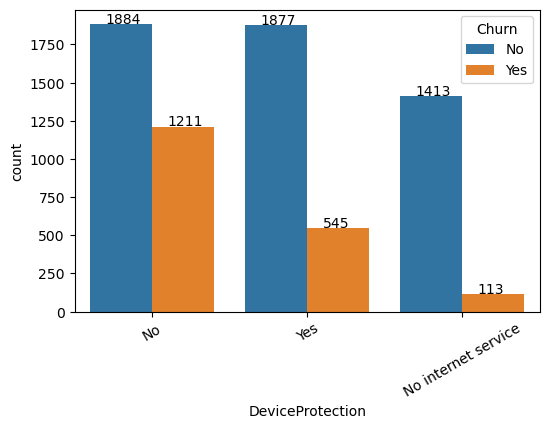

In [37]:
plt.figure(dpi=100)
plot = sns.countplot('DeviceProtection',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.DeviceProtection.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


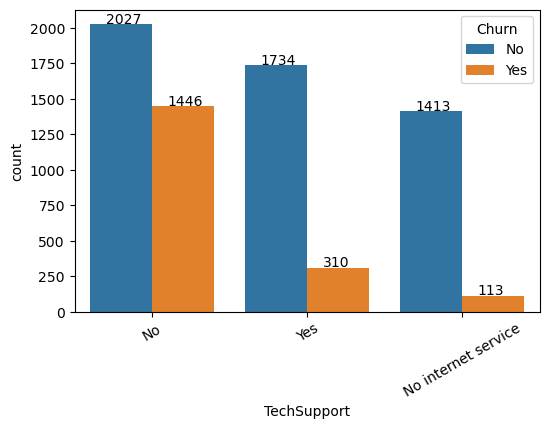

In [38]:
plt.figure(dpi=100)
plot = sns.countplot('TechSupport',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.TechSupport.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


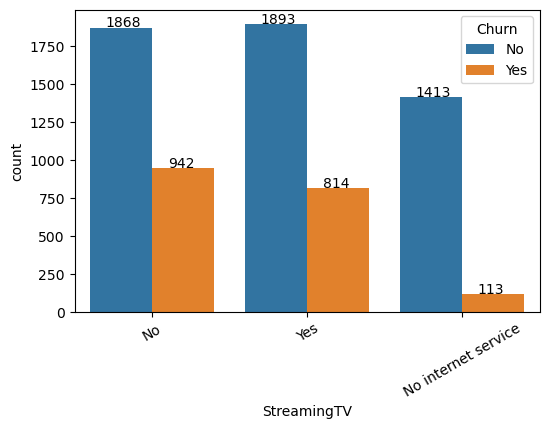

In [39]:
plt.figure(dpi=100)
plot = sns.countplot('StreamingTV',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.StreamingTV.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


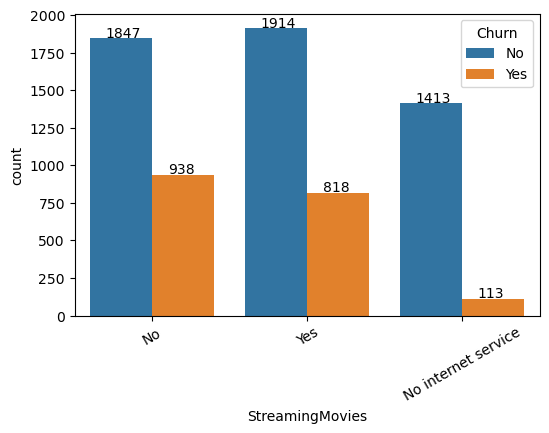

In [40]:
plt.figure(dpi=100)
plot = sns.countplot('StreamingMovies',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.StreamingMovies.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


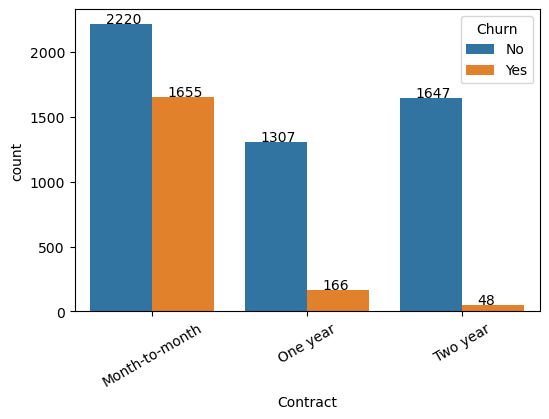

In [41]:
plt.figure(dpi=100)
plot = sns.countplot('Contract',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Contract.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


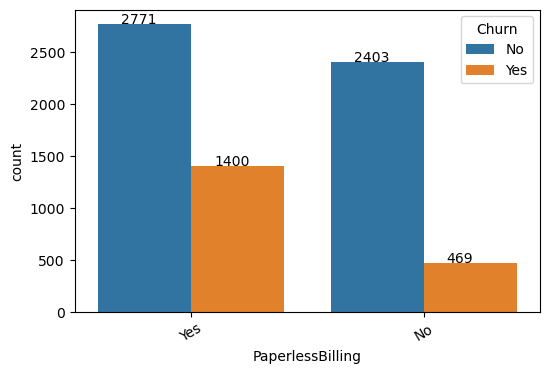

In [42]:
plt.figure(dpi=100)
plot = sns.countplot('PaperlessBilling',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PaperlessBilling.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


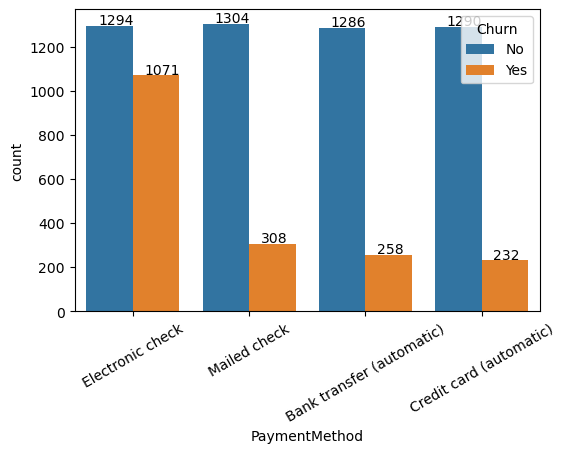

In [43]:
plt.figure(dpi=100)
plot = sns.countplot('PaymentMethod',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.PaymentMethod.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


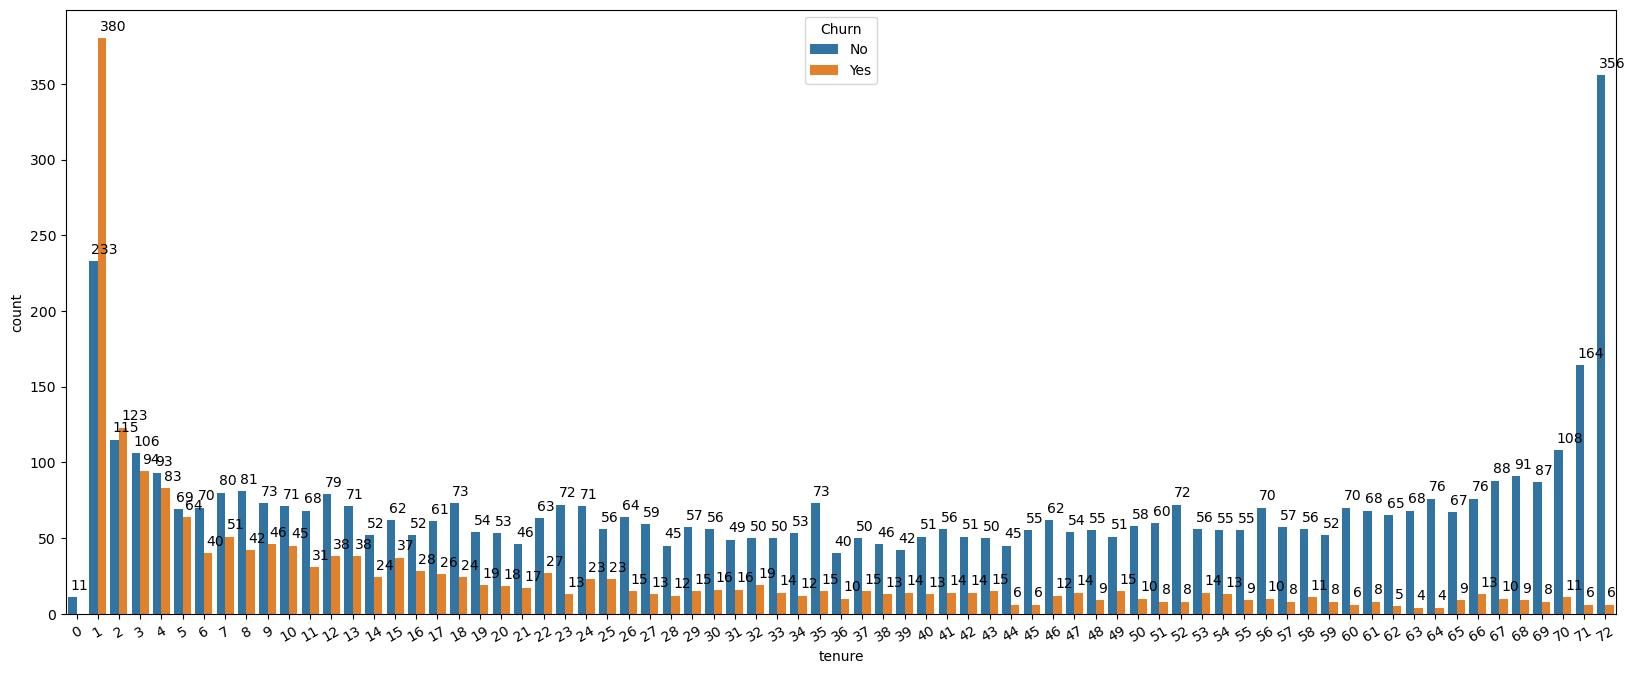

In [44]:
plt.figure(dpi=100, figsize=(20, 8))
plot = sns.countplot('tenure',data=df, hue='Churn')### **Question**:
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.tenure.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

In [45]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 7043
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 73
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1585
TotalCharges: Number of unique values 6530
Churn: Number of unique values 2


### Observation - 
- From above plot, it is clear that
    - customerID: Dosent play important role, considering dropping it.
- Unique values are listed.

In [46]:
df.drop('customerID', axis=1, inplace=True)

In [47]:
df.shape

(7043, 20)

In [48]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


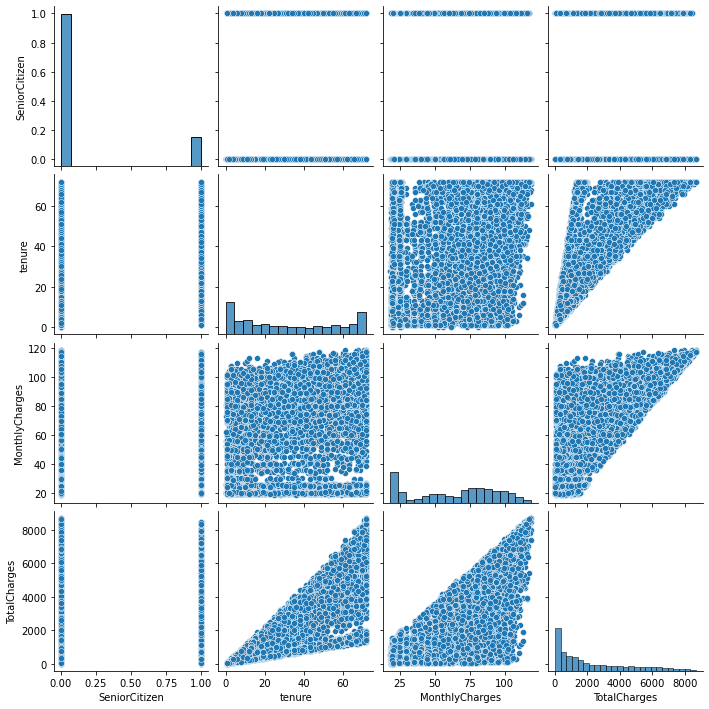

In [49]:
sns.pairplot(df)

<AxesSubplot:>

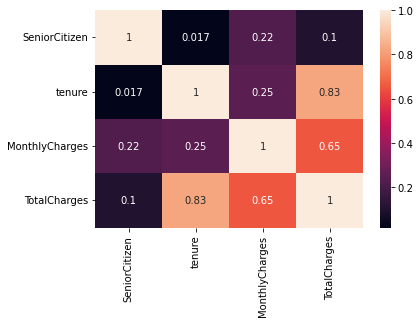

In [50]:
sns.heatmap(df.corr(), annot=True)

## Handling Outliers

SeniorCitizen        AxesSubplot(0.125,0.787927;0.168478x0.0920732)
tenure            AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
MonthlyCharges    AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
TotalCharges      AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
dtype: object

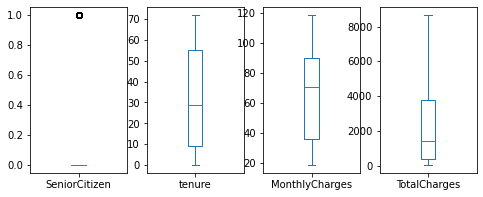

In [51]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

### Observation - 
- There are no outliers in data set.

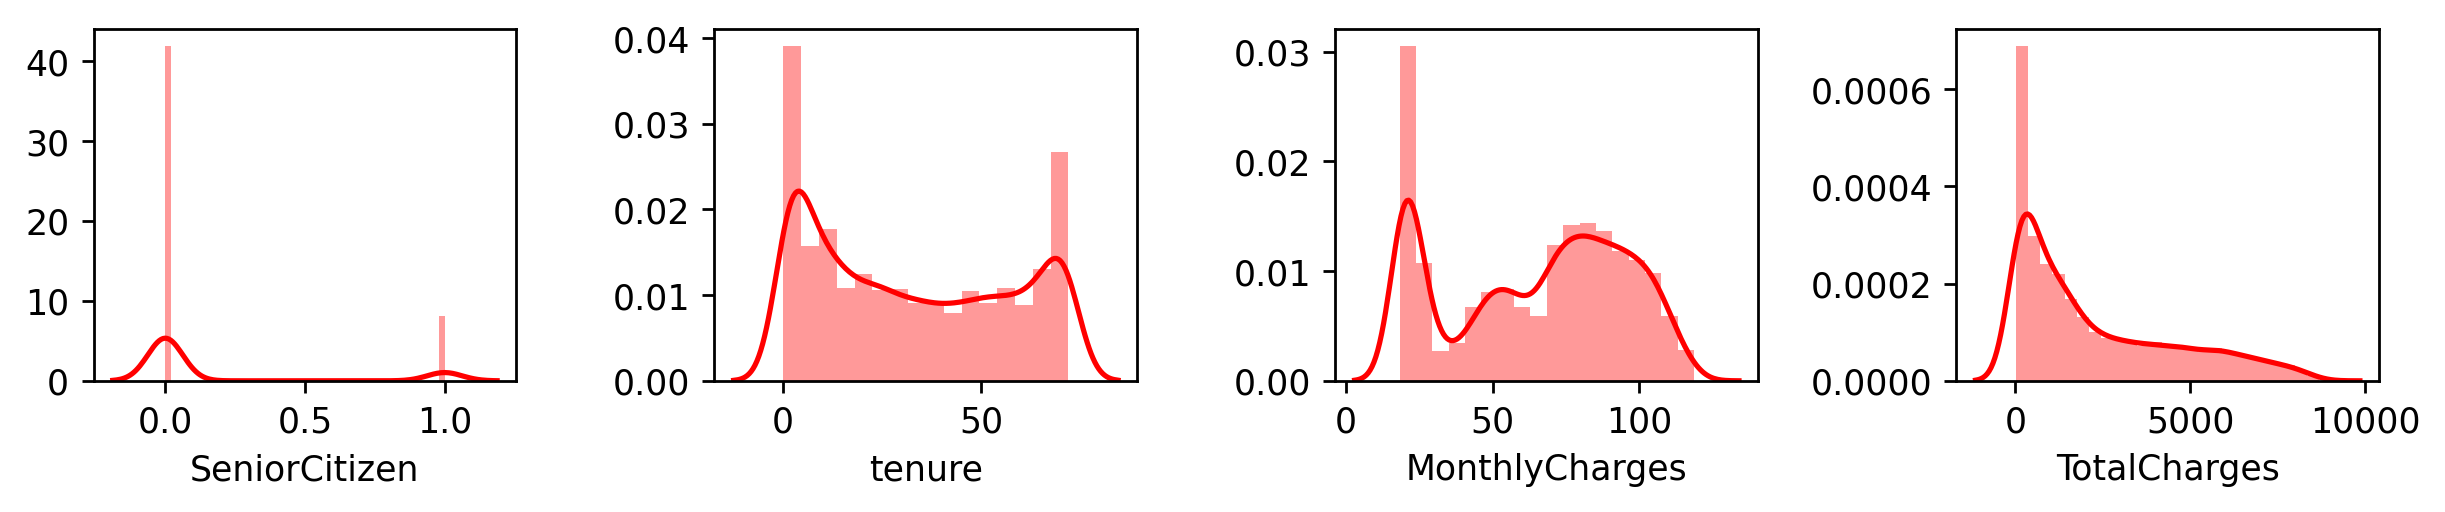

In [52]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(numerical_features)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[numerical_features[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [53]:
df.skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.961642
SeniorCitizen     1.833633
dtype: float64

In [54]:
#removal of skew-ness using log function
for col in numerical_features:
    if df.skew().loc[col]>0.3: 
        df[col]=np.log1p(df[col])

In [55]:
df.skew().sort_values()

TotalCharges     -0.743089
MonthlyCharges   -0.220524
tenure            0.239540
SeniorCitizen     1.833633
dtype: float64

<AxesSubplot:>

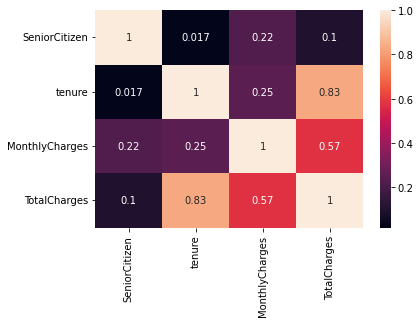

In [56]:
sns.heatmap(df.corr(), annot=True)

In [57]:
categorical_features.remove('customerID')

In [58]:
label_=LabelEncoder()

for i in categorical_features:
    df[i]=label_.fit_transform(df[i])

In [59]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.429137,0
1,1,0.0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,7.544597,0
2,1,0.0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.692723,1
3,1,0.0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,7.518471,0
4,0,0.0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.028148,1


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [62]:
y = df['Churn']

In [63]:
df.drop('Churn', axis=1, inplace=True)
x = df.copy()

In [64]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [65]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.000000,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.429137
1,1,0.000000,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,7.544597
2,1,0.000000,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.692723
3,1,0.000000,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,7.518471
4,0,0.000000,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.028148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.000000,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,7.596643
7039,0,0.000000,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,8.904345
7040,0,0.000000,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,5.850621
7041,1,0.693147,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,5.728800


In [66]:
x.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [68]:
x.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.000000,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.429137
1,1,0.000000,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,7.544597
2,1,0.000000,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.692723
3,1,0.000000,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,7.518471
4,0,0.000000,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.028148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.000000,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,7.596643
7039,0,0.000000,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,8.904345
7040,0,0.000000,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,5.850621
7041,1,0.693147,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,5.728800


In [70]:
x.drop('TotalCharges', axis=1, inplace=True)

In [71]:
calc_vif(x)

,variables,VIF FACTOR
0,gender,1.927219
1,SeniorCitizen,1.366668
2,Partner,2.820681
3,Dependents,1.953419
4,tenure,7.472560
5,PhoneService,14.163616
6,MultipleLines,2.752970
7,InternetService,4.318899
8,OnlineSecurity,2.248957
9,OnlineBackup,2.434160


In [72]:
x.drop('MonthlyCharges', axis=1, inplace=True)
calc_vif(x)

,variables,VIF FACTOR
0,gender,1.924585
1,SeniorCitizen,1.341491
2,Partner,2.816242
3,Dependents,1.948196
4,tenure,7.281865
5,PhoneService,7.976828
6,MultipleLines,2.409748
7,InternetService,3.096489
8,OnlineSecurity,2.248892
9,OnlineBackup,2.415112


In [73]:
x.drop('PhoneService', axis=1, inplace=True)
calc_vif(x)

,variables,VIF FACTOR
0,gender,1.875620
1,SeniorCitizen,1.335911
2,Partner,2.805122
3,Dependents,1.944324
4,tenure,7.143018
5,MultipleLines,2.389784
6,InternetService,2.330467
7,OnlineSecurity,2.213944
8,OnlineBackup,2.404659
9,DeviceProtection,2.582237


In [74]:
x.drop('tenure', axis=1, inplace=True)
calc_vif(x)

,variables,VIF FACTOR
0,gender,1.864775
1,SeniorCitizen,1.324879
2,Partner,2.666241
3,Dependents,1.939944
4,MultipleLines,2.174448
5,InternetService,2.329328
6,OnlineSecurity,2.161023
7,OnlineBackup,2.279408
8,DeviceProtection,2.540886
9,TechSupport,2.350746


In [75]:
x.shape

(7043, 15)

In [76]:
y.shape

(7043,)

# -- Model Building

In [79]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [80]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [82]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7196593328601846
Cross-val-score= 0.7108587480946802


roc_auc_score 0.6367596181359415


              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1039
           1       0.47      0.46      0.46       370

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



[[843 196]
 [199 171]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


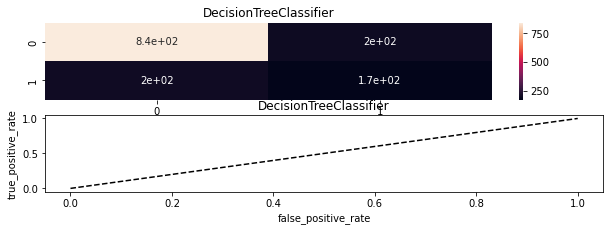

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.7601135557132718
Cross-val-score= 0.7500894398044922


roc_auc_score 0.6659300782977394


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1039
           1       0.55      0.47      0.51       370

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.67      1409
weighted avg       0.75      0.76      0.75      1409



[[898 141]
 [197 173]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


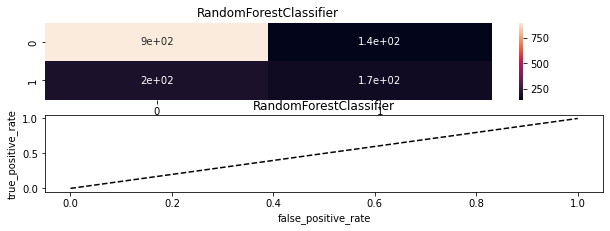

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.7643718949609652
Cross-val-score= 0.7403263293148408


roc_auc_score 0.6749083058033972


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1039
           1       0.56      0.49      0.52       370

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.76      0.76      0.76      1409



[[897 142]
 [190 180]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


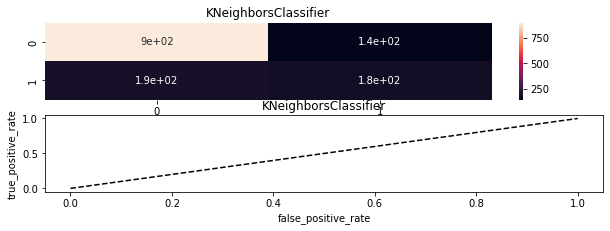

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7097232079489
Cross-val-score= 0.7390861393497349


roc_auc_score 0.7318263402960227


              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1039
           1       0.47      0.78      0.58       370

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.73      1409



[[712 327]
 [ 82 288]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


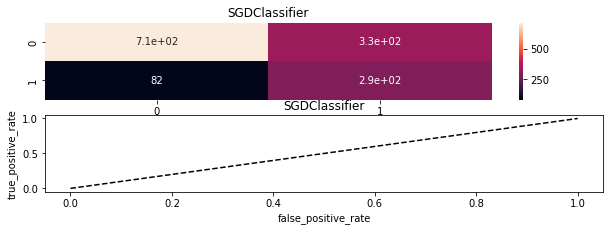

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.7842441447835344
Cross-val-score= 0.774584923724223


roc_auc_score 0.6753310095466015


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1039
           1       0.62      0.45      0.52       370

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



[[940  99]
 [205 165]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


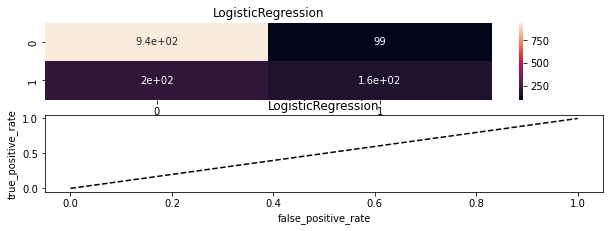

In [85]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  72.080200  71.327182  62.412944
1      RandomForestClassifier  75.736745  74.804826  63.800223
2        KNeighborsClassifier  73.783713  73.953158  64.365759
3               SGDClassifier  76.233482  74.733854  68.407650
4          LogisticRegression  77.777547  76.933996  66.119534
5                   LinearSVC  77.919769  77.217885  65.521107
6  GradientBoostingClassifier  78.238918  77.998581  68.508933
7                  GaussianNB  75.079331  74.237048  73.078248
 ------------------------ Results with Random State 1 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.352431  71.540099  62.757700
1      RandomForestClassifier  75.630236  75.372605  66.074891
2        KNeighborsClassifier  74.068283  76.011356  68.043864
3               SGDClas

 ------------------------ Results with Random State 13 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.725716  72.036906  62.952650
1      RandomForestClassifier  75.878935  76.579134  66.732439
2        KNeighborsClassifier  74.103649  75.372605  67.283283
3               SGDClassifier  75.061632  74.875798  67.675668
4          LogisticRegression  77.457988  78.424414  67.609720
5                   LinearSVC  77.351354  79.276082  67.455885
6  GradientBoostingClassifier  78.114647  79.063165  69.219434
7                  GaussianNB  74.440686  75.443577  74.685326
 ------------------------ Results with Random State 14 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  69.985797  73.243435  65.176493
1      RandomForestClassifier  74.635942  76.437189  66.519047
2        KNeighborsClassifier  73.695218  74.733854  66.359216
3               SGDCl

 ------------------------ Results with Random State 26 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  72.364675  70.901348  62.395138
1      RandomForestClassifier  75.595090  76.366217  66.977545
2        KNeighborsClassifier  73.181128  73.882186  64.579494
3               SGDClassifier  75.646958  72.746629  65.550127
4          LogisticRegression  77.919769  76.579134  66.117069
5                   LinearSVC  77.724387  77.572747  66.145800
6  GradientBoostingClassifier  78.362968  78.566359  70.097183
7                  GaussianNB  74.990489  74.378992  73.761916
 ------------------------ Results with Random State 27 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  72.435377  70.617459  62.446926
1      RandomForestClassifier  76.110156  75.514549  65.535370
2        KNeighborsClassifier  74.867572  73.101490  64.093421
3               SGDCl

 ------------------------ Results with Random State 39 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.193297  71.043293  63.555246
1      RandomForestClassifier  75.062324  75.372605  65.904441
2        KNeighborsClassifier  74.601080  74.662881  65.335968
3               SGDClassifier  75.825681  76.579134  63.737374
4          LogisticRegression  77.334032  77.501774  66.756052
5                   LinearSVC  77.547082  77.714691  65.449508
6  GradientBoostingClassifier  78.132913  78.353442  69.897182
7                  GaussianNB  74.849401  75.372605  73.759462
 ------------------------ Results with Random State 40 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  73.233564  71.469127  63.735397
1      RandomForestClassifier  76.464419  73.953158  64.578079
2        KNeighborsClassifier  74.902372  72.533712  63.525983
3               SGDCl

 ------------------------ Results with Random State 52 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.422250  70.262598  61.351367
1      RandomForestClassifier  75.984184  74.024131  62.780834
2        KNeighborsClassifier  74.511482  73.811214  64.854300
3               SGDClassifier  75.079079  76.792051  69.447432
4          LogisticRegression  77.351417  78.353442  68.792217
5                   LinearSVC  77.244939  78.495387  68.067543
6  GradientBoostingClassifier  78.274442  78.850248  70.530493
7                  GaussianNB  74.972223  74.804826  73.098717
 ------------------------ Results with Random State 53 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.920594  70.901348  62.946343
1      RandomForestClassifier  75.346264  75.514549  65.403395
2        KNeighborsClassifier  74.335059  73.243435  64.455165
3               SGDCl

 ------------------------ Results with Random State 65 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.299775  71.894961  63.193267
1      RandomForestClassifier  75.505587  76.011356  66.837932
2        KNeighborsClassifier  74.033011  74.308020  65.586526
3               SGDClassifier  75.754444  74.946771  62.588877
4          LogisticRegression  78.097294  76.224273  65.675085
5                   LinearSVC  78.026183  75.727466  63.697647
6  GradientBoostingClassifier  78.133070  78.069553  68.578449
7                  GaussianNB  74.831671  75.230660  73.337990
 ------------------------ Results with Random State 66 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.565071  70.901348  61.852034
1      RandomForestClassifier  76.073813  74.804826  64.707142
2        KNeighborsClassifier  74.191766  74.024131  65.758229
3               SGDCl

 ------------------------ Results with Random State 78 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.672083  71.965933  63.811448
1      RandomForestClassifier  75.346674  75.230660  65.318151
2        KNeighborsClassifier  74.636509  72.746629  64.603303
3               SGDClassifier  74.636950  75.656494  66.045530
4          LogisticRegression  77.884056  77.004968  67.485147
5                   LinearSVC  77.866357  77.430802  66.543588
6  GradientBoostingClassifier  78.505568  76.933996  68.491182
7                  GaussianNB  74.831671  74.804826  74.165205
 ------------------------ Results with Random State 79 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  72.541571  70.972321  62.530723
1      RandomForestClassifier  75.576351  74.875798  65.180748
2        KNeighborsClassifier  75.221615  73.669269  64.715560
3               SGDCl

 ------------------------ Results with Random State 91 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  71.565228  69.339957  59.820374
1      RandomForestClassifier  75.133026  74.449965  63.556931
2        KNeighborsClassifier  73.428946  74.237048  65.536299
3               SGDClassifier  75.186469  75.656494  64.294004
4          LogisticRegression  77.653465  77.501774  67.675693
5                   LinearSVC  77.689209  77.430802  65.757834
6  GradientBoostingClassifier  78.452439  77.998581  68.099162
7                  GaussianNB  75.097754  74.308020  72.722760
 ------------------------ Results with Random State 92 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  70.944377  71.823989  63.100515
1      RandomForestClassifier  75.559030  76.579134  67.021285
2        KNeighborsClassifier  74.050206  75.372605  66.731795
3               SGDCl

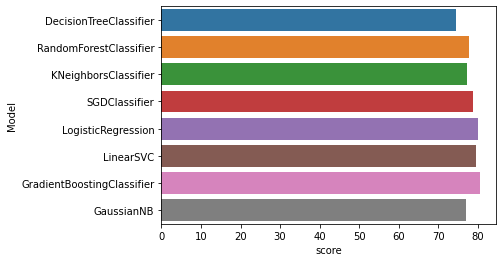

In [86]:
for i in [i for i in range(0, 101)]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    
    # To Prevent Data Leakages, We are scaling data for each train and test. To keep, 
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()

        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

### Observation - 
- Getting maximum accuracy of 79.18 at random state 34.
- Using hyper parameter tuning for boosting performace

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [90]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [91]:
clf_gb.best_score_

0.7818600959903254

In [92]:
clf_gb.best_params_

{'n_estimators': 500}

In [93]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.176637,0.017057,0.004185,0.002776,500,{'n_estimators': 500},0.776596,0.787234,0.79078,0.77305,0.776199,0.795737,0.777975,0.788632,0.769094,0.783304,0.78186,0.008151,1


In [96]:
pred=clf_gb.predict(x_test)
print(f'Accuracy of GradientBoostingClassifier is {round(accuracy_score(pred,y_test)*100,8)}')

Accuracy of GradientBoostingClassifier is 77.00496806


In [97]:
cv=model_selection.cross_val_score(clf_gb,x_train,y_train,cv=10,scoring='accuracy').mean()

In [98]:
cv

0.7818600959903254

In [99]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
roc_auc=roc_auc_score(y_test,pred)

In [102]:
print(roc_auc*100)

68.711650475996


## Creating Model For Production, Gradient Boosting = 78.18%

In [103]:
# Save File
import pickle
file = 'Customer_churn'
#save file
save = pickle.dump(pred,open(file,'wb'))